In [1]:
pip install pytrends


   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.0 MB 9.6 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl='en-IN', tz=330)

try:
    kw_list = ["airtel", "jio"]
    pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m')  # safer than now 30-d
    data = pytrends.interest_over_time()
    print(data.head())

except Exception as e:
    import traceback
    traceback.print_exc()
#relative search interest

            airtel  jio  isPartial
date                              
2025-05-30      44   75      False
2025-05-31      46   67      False
2025-06-01      45   78      False
2025-06-02      43   61      False
2025-06-03      43  100      False


c:\Users\Jigyasa Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


c:\Users\Jigyasa Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


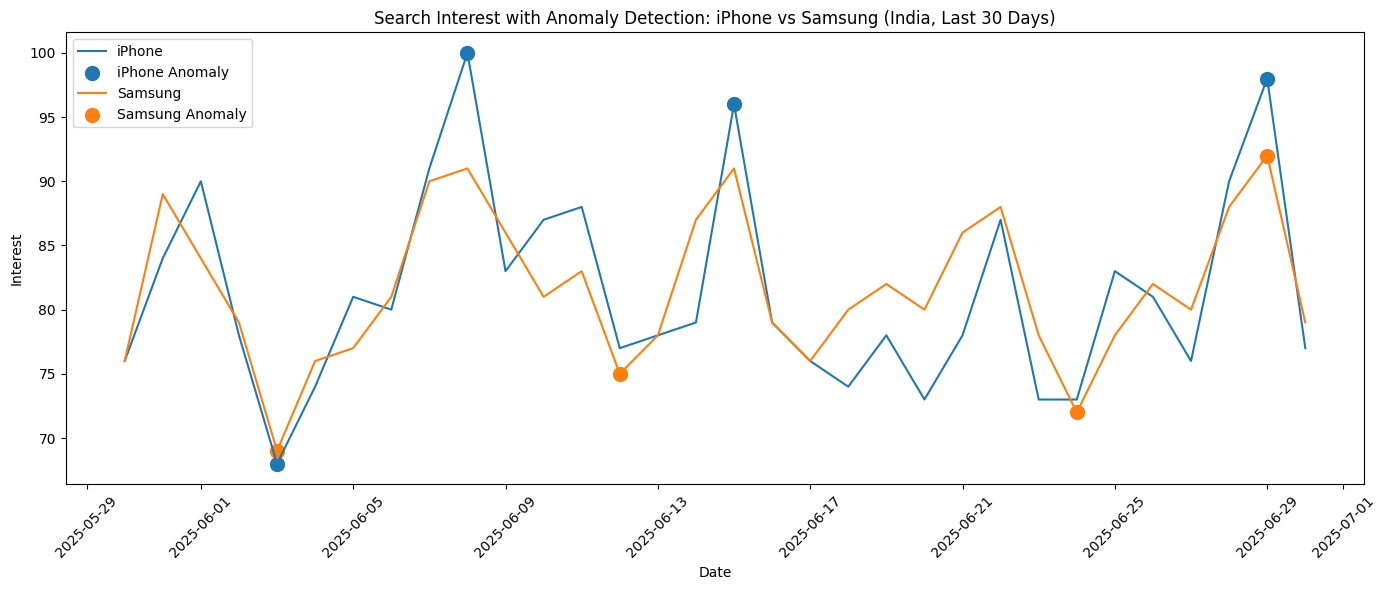


📍 Top Regions for: iPhone
geoName
Sikkim               61
Mizoram              59
Punjab               58
Chandigarh           58
Jammu & Kashmir      55
Delhi                55
Arunachal Pradesh    55
Haryana              54
Telangana            54
Karnataka            54
Name: iPhone, dtype: int64

📍 Top Regions for: Samsung
geoName
Odisha            59
Bihar             59
Jharkhand         57
West Bengal       57
Tamil Nadu        55
Andhra Pradesh    55
Chhattisgarh      54
Puducherry        54
Gujarat           53
Uttar Pradesh     53
Name: Samsung, dtype: int64


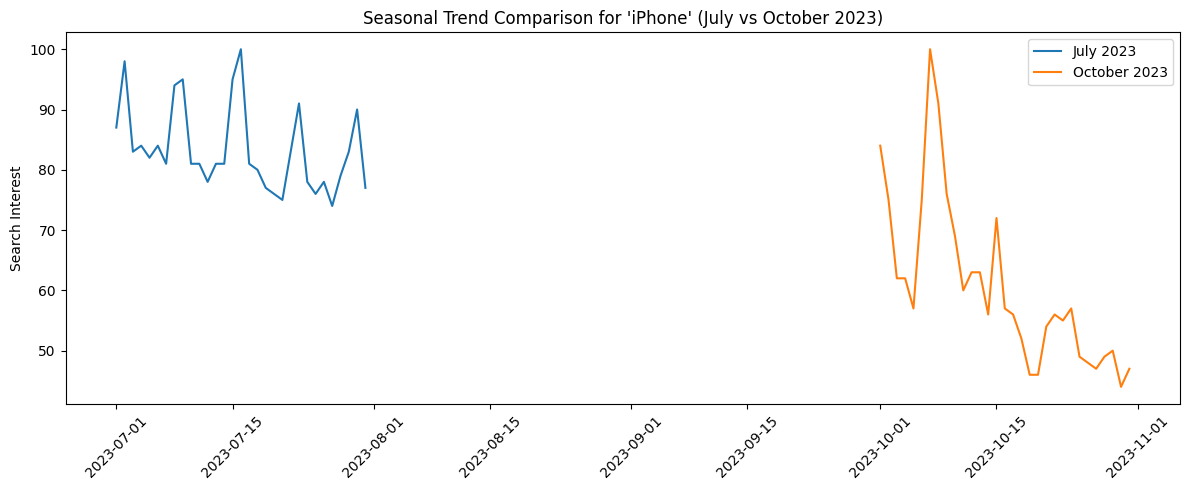

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Initialize PyTrends
pytrends = TrendReq(hl='en-IN', tz=330)

# Keywords to analyze
kw_list = ["iPhone", "Samsung"]

# === PART 1: Trend data for past 30 days ===
pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m', geo='IN')  # All-India

# Fetch data
data = pytrends.interest_over_time().reset_index().drop(columns=['isPartial'])

# === PART 2: Apply Isolation Forest per keyword ===
for kw in kw_list:
    model = IsolationForest(contamination=0.1, random_state=42)
    data[f'{kw}_anomaly'] = model.fit_predict(data[[kw]])

# === PART 3: Plotting anomalies ===
plt.figure(figsize=(14, 6))
for kw in kw_list:
    plt.plot(data['date'], data[kw], label=kw)
    anomalies = data[data[f'{kw}_anomaly'] == -1]
    plt.scatter(anomalies['date'], anomalies[kw], s=100, label=f'{kw} Anomaly')

plt.title("Search Interest with Anomaly Detection: iPhone vs Samsung (India, Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# === PART 4: Geo-Level Breakdown ===
# Let's fetch top cities for each keyword
for kw in kw_list:
    print(f"\n📍 Top Regions for: {kw}")
    geo_df = pytrends.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
    print(geo_df[kw].sort_values(ascending=False).head(10))

# === PART 5: Seasonal Comparison (July vs October) ===
# You can loop over historical timeframes manually for year-on-year comparison

def get_monthly_trend(keyword, month_range, year):
    timeframe = f"{year}-{month_range[0]}-01 {year}-{month_range[1]}-31"
    pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='IN')
    return pytrends.interest_over_time()[keyword].reset_index()

# Example: iPhone - July vs October
july_data = get_monthly_trend("iPhone", ("07", "07"), "2023")
oct_data = get_monthly_trend("iPhone", ("10", "10"), "2023")

plt.figure(figsize=(12, 5))
plt.plot(july_data['date'], july_data['iPhone'], label='July 2023')
plt.plot(oct_data['date'], oct_data['iPhone'], label='October 2023')
plt.title("Seasonal Trend Comparison for 'iPhone' (July vs October 2023)")
plt.xticks(rotation=45)
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Define monthly income and fixed expenses
income = 29000
rent = 10000
spends = 7000
loan_emi = 3000
sips = 6000

# Calculate remaining amount for savings/prepayment
remaining = income - (rent + spends + loan_emi + sips)

# Generate months till loan ends (25 months from July 2025)
months = pd.date_range(start="2025-07-01", periods=25, freq='MS').strftime("%B %Y").tolist()

# Create monthly budget DataFrame
budget_data = {
    "Month": months,
    "Income (₹)": [income] * len(months),
    "Rent (₹)": [rent] * len(months),
    "Other Spends (₹)": [spends] * len(months),
    "Loan EMI (₹)": [loan_emi] * len(months),
    "SIPs (₹)": [sips] * len(months),
    "Remaining for Prepay/Emergency (₹)": [remaining] * len(months),
}

budget_df = pd.DataFrame(budget_data)

# Calculate cumulative savings for prepayment every 6 months
budget_df["Cumulative Prepay Savings (₹)"] = budget_df["Remaining for Prepay/Emergency (₹)"].cumsum()

# Add expected prepayment schedule every 6 months
budget_df["Prepayment Done (₹)"] = 0
for i in [5, 11, 17, 23]:  # every 6 months from start (month index)
    if i < len(budget_df):
        budget_df.loc[i, "Prepayment Done (₹)"] = 25000

# Calculate adjusted cumulative savings after each prepayment
budget_df["Net Prepay Reserve (₹)"] = budget_df["Cumulative Prepay Savings (₹)"].cumsum() - budget_df["Prepayment Done (₹)"].cumsum()

# Display the full budget plan
print(budget_df)

# Optional: Save to Excel
budget_df.to_excel("Loan_Budget_Tracker.xlsx", index=False)


             Month  Income (₹)  Rent (₹)  Other Spends (₹)  Loan EMI (₹)  \
0        July 2025       29000     10000              7000          3000   
1      August 2025       29000     10000              7000          3000   
2   September 2025       29000     10000              7000          3000   
3     October 2025       29000     10000              7000          3000   
4    November 2025       29000     10000              7000          3000   
5    December 2025       29000     10000              7000          3000   
6     January 2026       29000     10000              7000          3000   
7    February 2026       29000     10000              7000          3000   
8       March 2026       29000     10000              7000          3000   
9       April 2026       29000     10000              7000          3000   
10        May 2026       29000     10000              7000          3000   
11       June 2026       29000     10000              7000          3000   
12       Jul

In [2]:
# Fallback: Use `ics` generation manually without external library

def generate_ics_event(title, start_dt, end_dt):
    return f"""BEGIN:VEVENT
SUMMARY:{title}
DTSTART:{start_dt.strftime('%Y%m%dT%H%M%S')}
DTEND:{end_dt.strftime('%Y%m%dT%H%M%S')}
END:VEVENT
"""

# Start the calendar content
calendar_content = "BEGIN:VCALENDAR\nVERSION:2.0\nCALSCALE:GREGORIAN\n"
start_date = '01-07-2025'
# Add daily events
for i in range(31):
    day = start_date + timedelta(days=i)
    for title, start_time_str, duration in event_details:
        start_time = datetime.strptime(f"{day.strftime('%Y-%m-%d')} {start_time_str[-5:]}", "%Y-%m-%d %H:%M")
        end_time = start_time + timedelta(minutes=duration)
        calendar_content += generate_ics_event(title, start_time, end_time)

# Add Saturday special events
for i in range(5):
    sat_date = start_date + timedelta(days=(5 - start_date.weekday() + 7 * i) % 7 + 7 * i)
    if sat_date.month == 7:
        title = "Weekend Project or GATE Mock"
        start_time = datetime.combine(sat_date, datetime.strptime("08:00", "%H:%M").time())
        end_time = start_time + timedelta(hours=2)
        calendar_content += generate_ics_event(title, start_time, end_time)

# End the calendar content
calendar_content += "END:VCALENDAR"

# Save to file
ics_file_path = "/mnt/data/July_Learning_Schedule.ics"
with open(ics_file_path, "w") as f:
    f.write(calendar_content)

ics_file_path


NameError: name 'timedelta' is not defined